In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
metrics = pd.read_csv('models/metrics.csv')
winrates = pd.read_csv('models/winrates.csv')
# decays = pd.read_csv('models/decays.csv', names=['decays'])

In [27]:
rewards_rl = pd.read_csv('rewards_rl.csv', names=['reward'])
rewards_opp = pd.read_csv('rewards_opp.csv', names=['reward'])

In [28]:
metrics.shape, winrates.shape

((4713, 7), (236, 3))

In [29]:
metrics.tail()

,episode,n_agents,value_loss_avg,value_loss_median,action_loss_avg,action_loss_median,reward_avg
4708,4708,1,1.502235e-10,1.502235e-10,-0.000053,-0.000053,-0.003540
4709,4709,1,2.685538e-10,2.685538e-10,-0.000092,-0.000092,-0.003637
4710,4710,1,3.165026e-10,3.165026e-10,-0.000059,-0.000059,-0.003653
4711,4711,1,2.383746e-10,2.383746e-10,-0.000114,-0.000114,-0.003460
4712,4712,1,1.491705e-09,1.491705e-09,-0.000090,-0.000090,-0.003383


In [30]:
winrates.tail() 

,episode,vs_random,vs_fixed
231,4620,80.0,0.0
232,4640,50.0,10.0
233,4660,60.0,0.0
234,4680,80.0,0.0
235,4700,100.0,0.0


In [31]:
rewards_rl_no_dubs = rewards_rl.drop_duplicates()
rewards_opp_no_dubs = rewards_opp.drop_duplicates()
rewards_rl.shape, rewards_opp.shape, rewards_rl_no_dubs.shape, rewards_opp_no_dubs.shape

((369, 1), (339, 1), (2, 1), (1, 1))

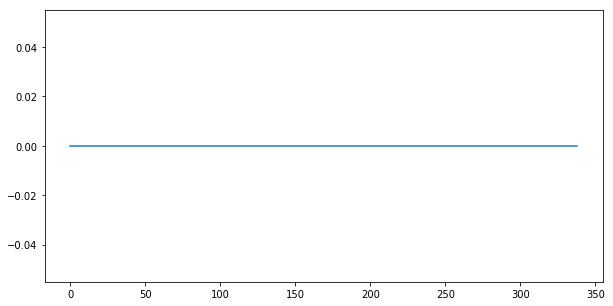

In [32]:
plt.figure(figsize=(10,5))
plt.plot(rewards_opp.index, rewards_opp.reward)
plt.show()

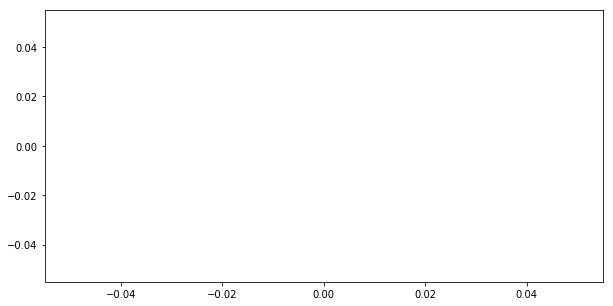

In [33]:
plt.figure(figsize=(10,5))
plt.plot(rewards_opp_no_dubs.index, rewards_opp_no_dubs.reward)
plt.show()

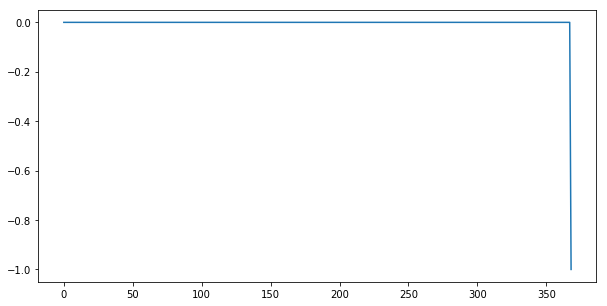

In [34]:
plt.figure(figsize=(10,5))
plt.plot(rewards_rl.index, rewards_rl.reward)
plt.show()

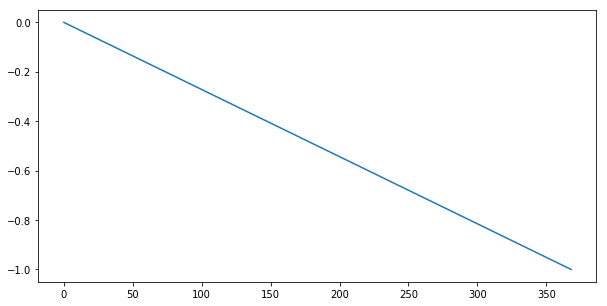

In [35]:
plt.figure(figsize=(10,5))
plt.plot(rewards_rl_no_dubs.index, rewards_rl_no_dubs.reward)
plt.show()

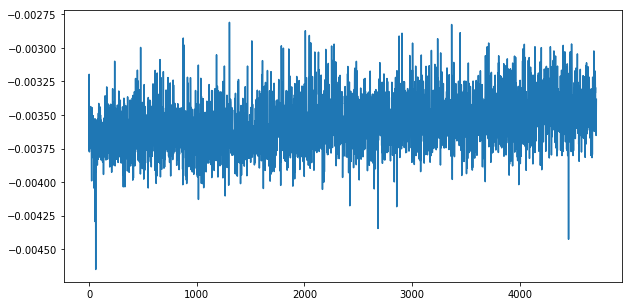

In [36]:
plt.figure(figsize=(10,5))
plt.plot(metrics.episode, metrics.reward_avg)
plt.show()

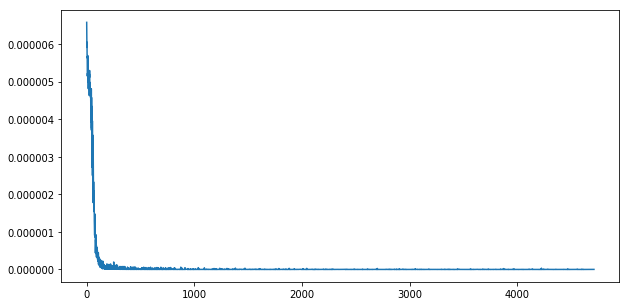

In [37]:
plt.figure(figsize=(10,5))
plt.plot(metrics.episode, metrics.value_loss_avg)
plt.show()

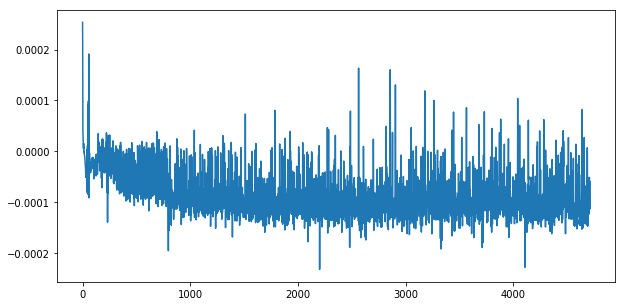

In [38]:
plt.figure(figsize=(10,5))
plt.plot(metrics.episode, metrics.action_loss_avg)
plt.show()

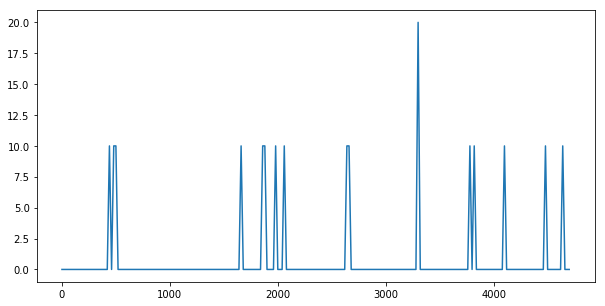

In [39]:
plt.figure(figsize=(10,5))
plt.plot(winrates.episode, winrates.vs_fixed)
plt.show()

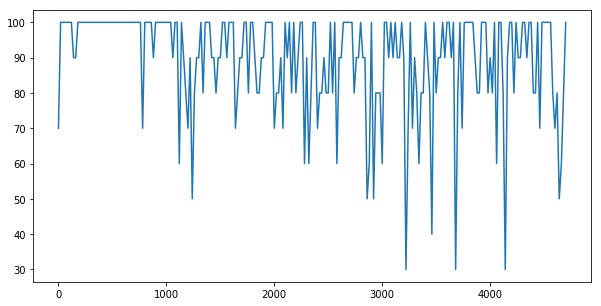

In [40]:
plt.figure(figsize=(10,5))
plt.plot(winrates.episode, winrates.vs_random)
plt.show()

In [41]:
winrates[winrates.vs_fixed == winrates.vs_fixed.max()]

,episode,vs_random,vs_fixed
165,3300,90.0,20.0
